In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras import backend as K

Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet', include_top=False)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
bloc

In [3]:
layer_name = 'block3_conv1'
channel = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, channel])
grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
grads.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(3)])

In [0]:
def build_image(data):
    data -= data.mean()
    data /= (data.std() + 1e-5)
    data *= 0.1
    
    data += 0.5
    data = np.clip(data, 0, 1)
    
    data *= 255
    data = np.clip(data, 0, 255).astype('uint8')
    
    return data

In [0]:
def generate_pattern(layer_name, channel, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, channel])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    for i in range(40):
        loss_value, grads_value = iterate([input_data])
        input_data += grads_value
    
    img = input_data[0]
    return build_image(img)

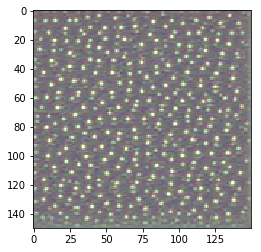

In [6]:
img = generate_pattern('block3_conv1', 0)
plt.figure()
plt.imshow(img)
plt.show()

In [7]:
layer_name = 'block3_conv1'
n_channels = 25
n_cols = 5
n_rows = n_channels // n_cols
plt.figure(figsize=(20, 20))
for row in range(n_rows):
    for col in range(n_cols):
        channel = row * n_cols + col
        img = generate_pattern(layer_name, channel)
        plt.subplot(n_rows, n_cols, channel + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.